# Introduction to networks
#### Insights into network:
- important entities (influencers in social network)
- pathfinding (transportation network)
- clustering (find communities)

What is the size of the graph T, the type of T.nodes(), and the data structure of the third element of the last edge listed in T.edges(data=True)? The len() and type() functions will be useful here. To access the last entry of T.edges(data=True), you can use list(T.edges(data=True))[-1]

#### builing a graph yourself
- G = nx.Graph()
- G.add_nodes_from([1,2,3])
- G.nodes()
- G.add_edge(1,2)
- G.edges()
- adding metadata to node: G.node[1]['label']='A'
- nodes list with meta data: G.nodes(data=True)

In [0]:
import pickle
with open("ego-twitter.p", "rb") as input_file:
  T = pickle.load(input_file)

In [8]:
len(T)

23369

In [0]:
type(T.nodes())

networkx.classes.reportviews.NodeView

In [0]:
list(T.edges(data=True))[-1]

(23324, 23336, {'date': datetime.date(2010, 9, 20)})

In [0]:
type(list(T.edges(data=True))[-1][2])

dict

[1, 2, 3, 4]


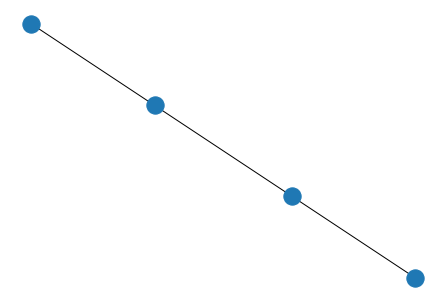

In [0]:
## NetworkX provides some basic drawing functionality that works for small graphs.

# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph to screen

G = nx.Graph()
G.add_nodes_from([1,2,3,4])
print(G.nodes())
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,4)
G.node[1]['label']='A'
G.node[2]['label']='B'
G.node[3]['label']='C'
G.node[4]['label']='C'

nx.draw(G)
#See draw_networkx() for more full-featured drawing that allows title, axis labels etc.
plt.show()

## query graph

In [0]:
import datetime

In [0]:
## you're going to look for "nodes of interest" and "edges of interest"

# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < datetime.date(2010, 1, 1)]

In [0]:
## types of graphs
g = nx.Graph() ##undirected
d = nx.DiGraph() ##directed
m = nx.MultiGraph() #multi-edge graph
n = nx.MultiDiGraph() #multi-edge directed graph
type(g) , type(d) , type(m), type(n)

(networkx.classes.graph.Graph,
 networkx.classes.digraph.DiGraph,
 networkx.classes.multigraph.MultiGraph,
 networkx.classes.multidigraph.MultiDiGraph)

Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

In [0]:
T.edges[1, 10]

{'date': datetime.date(2012, 9, 8)}

In [0]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u,v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1

As Eric discussed, NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: `.number_of_selfloops()`.

In [0]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u==v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

## Visualizing network plots

In [0]:
G.nodes(data=True)

NodeDataView({1: {'label': 'A'}, 2: {'label': 'B'}, 3: {'label': 'C'}, 4: {}})

It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, nxviz provides a MatrixPlot object.

nxviz is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes nx.to_numpy_matrix(G), which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.

A corresponding nx.from_numpy_matrix(A) allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (nx.from_numpy_matrix(A, create_using=nx.DiGraph)).

In [0]:
!pip install nxviz

### matrixplot

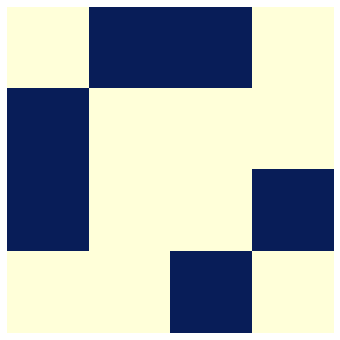

In [0]:
# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(G)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(G)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'label' not in d.keys()

In [0]:
T_conv.nodes(data=True) #meta-data lost

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}})

### Circos
Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In [0]:
G = nx.Graph()
G.add_nodes_from([i for i in range(100)])
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,4)

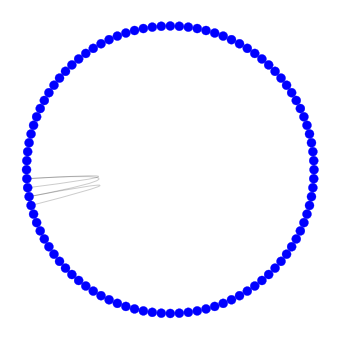

In [0]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(G)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()

### Arcplots
Following on what you've learned about the nxviz API, now try making an ArcPlot of the network. Two keyword arguments that you will try here are node_order='keyX' and node_color='keyX', in which you specify a key in the node metadata dictionary to color and order the nodes by.

In [0]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
print(G.nodes())
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,4)
G.node[1]['label']='A'
G.node[2]['label']='B'
G.node[3]['label']='C'
G.node[4]['label']='C'

[1, 2, 3, 4]


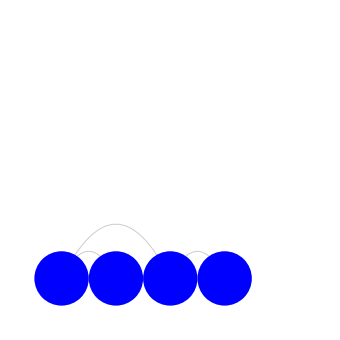

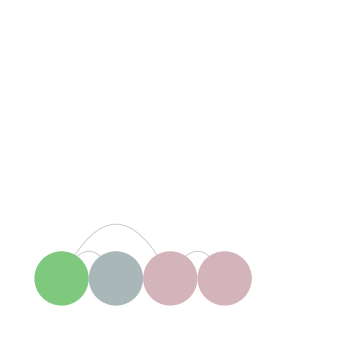

In [0]:

# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(G)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
#order and color by a meta-data of the nodes
a2 = ArcPlot(G,node_order='label',node_color='label')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()


# Important nodes


In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import datetime
# !pip install nxviz
import nxviz as nv
from nxviz import CircosPlot
from nxviz import ArcPlot

In [3]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
print(G.nodes())
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,4)
G.node[1]['label']='A'
G.node[2]['label']='B'
G.node[3]['label']='C'
G.node[4]['label']='C'

[1, 2, 3, 4]


## Importance of a node:
- `degree centrality = num of neighbours i have / number of neighbours i could possibly have`
- neighbours i could have is all nodes - myself(for no self-loop graph) or + myself (where self-loop is allowed)
- G.neighbours(node)
- nx.degree_centrality(G) --> gives the degree centrality of all nodes ##here, self-loops are not considered

In [9]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G,m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T,6)
print(six_nbrs)

{22533, 1803, 11276, 11279, 6161, 4261, 10149, 3880, 16681, 5420, 14898, 64, 14539, 6862, 20430, 9689, 475, 1374, 6112, 9186, 17762, 14956, 2927, 11764, 4725}


In [11]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

# Print the degrees
print(degrees)

[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 10, 27, 0, 0, 0, 0, 0, 0, 0, 0, 34, 0, 0, 0, 0, 0, 60, 0, 11, 4, 0, 12, 0, 0, 56, 53, 0, 30, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 6, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 39, 8, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 26, 0, 5, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 7, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5

### Degree centrality distribution
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

The nx.degree_centrality(G) function returns a dictionary, where the keys are the nodes and the values are their degree centrality values.

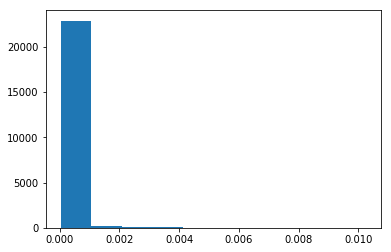

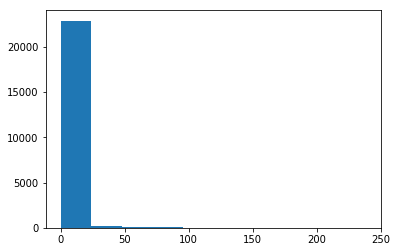

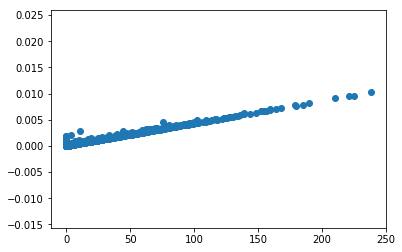

In [12]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(T)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

# Plot a histogram of the degree distribution of the graph
plt.figure()
plt.hist(degrees)
plt.show()

# Plot a scatter plot of the centrality distribution and the degree distribution
plt.figure()
plt.scatter(degrees,list(deg_cent.values()))
plt.show()

### Shortest Path
You can leverage what you know about finding neighbors to try finding paths in a network. One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

Pathfinding algorithms are important because they provide another way of assessing node importance

#### BFS

In [0]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

## Betweenness centrality
- captures bottleneck nodes in a graph
- num of shortest paths through node / all shortest path

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


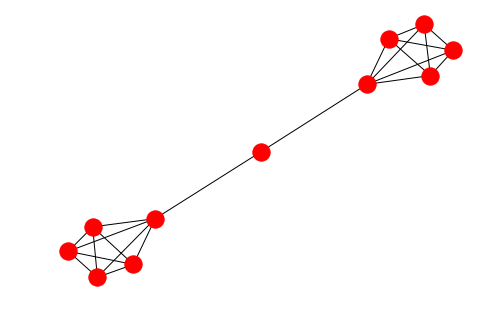

In [19]:
B = nx.barbell_graph(m1=5, m2=1)
nx.draw(B);
plt.show();

In [20]:
nx.betweenness_centrality(B)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 5: 0.5555555555555556,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0}

Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.

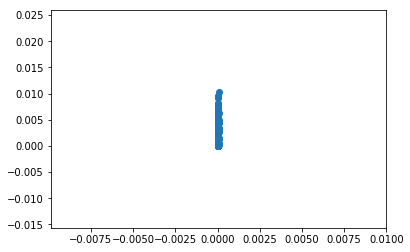

In [21]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()),list(deg_cen.values()))

# Display the plot
plt.show()

**There is a clear correlation**

In [22]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())

{11824}


In [0]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)

    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))

    nodes = set()

    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():

        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)

# Write an assertion statement that checks that the node(s) is/are correctly identified.
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

# Structure

### Network Clique = fully connected graph

**Identifying triangle relationships**

Now that you've learned about cliques, it's time to try leveraging what you know to find structures in a network. Triangles are what you'll go for first. We may be interested in triangles because they're the simplest complex clique. Let's write a few functions; these exercises will bring you through the fundamental logic behind network algorithms.

In [0]:
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1,n2):
            in_triangle = True
            break
    return in_triangle

### Finding nodes involved in triangles
NetworkX provides an API for counting the number of triangles that every node is involved in: nx.triangles(G). It returns a dictionary of nodes as the keys and number of triangles as the values. Your job in this exercise is to modify the function defined earlier to extract all of the nodes involved in a triangle relationship with a given node.

In [29]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1,n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

len(nodes_in_triangle(T, 1))

23

### Finding open triangles
Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

In [30]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1,n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

908


## Maximal Clique
- Joto boro possible clique (fully connected network) hoye gese. Adding another node, it wont be a clique anymore.
- edges are also cliques
- nx.find_cliques() gives out all maximal cliques

In [27]:
list(nx.find_cliques(B))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

In [0]:
# Define maximal_cliques()
def maximal_cliques(G,size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

## Subgraphs

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


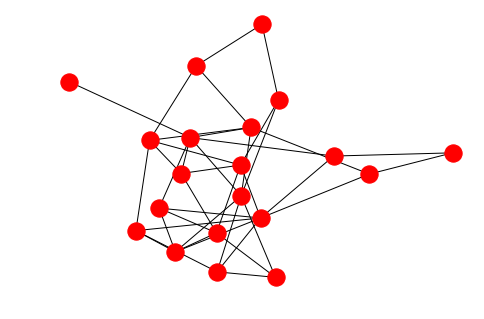

In [32]:
R = nx.erdos_renyi_graph(n=20,p=0.2)
nx.draw(R)
plt.show();

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


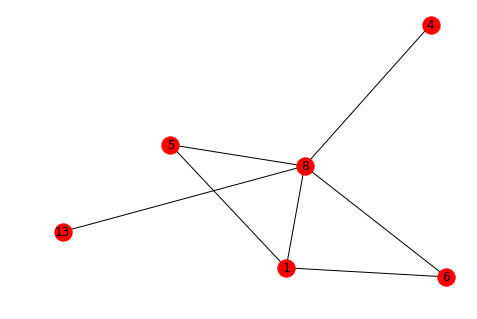

In [34]:
nodes = list(R.neighbors(8))
nodes.append(8)

R_sub = R.subgraph(nodes)
R_sub.edges() ##keeps all edges that where both nodes are in this subgraph
nx.draw(R_sub,with_labels=True)
plt.show();

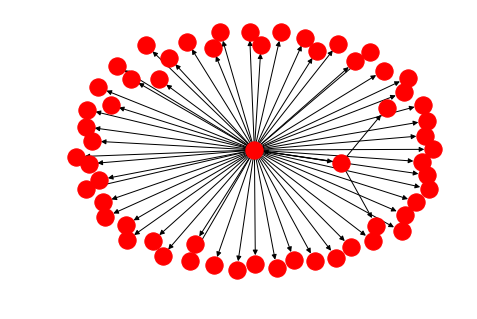

In [35]:
nodes_of_interest = [29, 38, 42]

# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T,nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

In [0]:
##  Extract nodes that have a particular metadata property and their neighbors, into a subgraph

# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()


# Bringing it all together

- Analyze
- Visualize 
- Build a recommender system

From **Github** dataset

In [0]:
import pickle
with open("github_users.p", "rb") as input_file:
  Github = pickle.load(input_file)

In [44]:
Github.nodes()

NodeView(('u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12', 'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20', 'u21', 'u22', 'u23', 'u24', 'u25', 'u26', 'u27', 'u28', 'u29', 'u30', 'u31', 'u32', 'u33', 'u34', 'u35', 'u36', 'u37', 'u38', 'u39', 'u40', 'u41', 'u42', 'u43', 'u44', 'u45', 'u46', 'u47', 'u48', 'u49', 'u50', 'u51', 'u52', 'u53', 'u54', 'u55', 'u56', 'u57', 'u58', 'u59', 'u60', 'u61', 'u62', 'u63', 'u64', 'u65', 'u66', 'u67', 'u68', 'u69', 'u70', 'u71', 'u72', 'u73', 'u74', 'u75', 'u76', 'u77', 'u78', 'u79', 'u80', 'u81', 'u82', 'u83', 'u84', 'u85', 'u86', 'u87', 'u88', 'u89', 'u90', 'u91', 'u92', 'u93', 'u94', 'u95', 'u96', 'u97', 'u98', 'u99', 'u100', 'u101', 'u102', 'u103', 'u104', 'u105', 'u106', 'u107', 'u108', 'u109', 'u110', 'u111', 'u112', 'u113', 'u114', 'u115', 'u116', 'u117', 'u118', 'u119', 'u120', 'u121', 'u122', 'u123', 'u124', 'u125', 'u126', 'u127', 'u128', 'u129', 'u130', 'u131', 'u132', 'u133', 'u134', 'u135', 'u136', 'u137', 'u

In [0]:
nodes = ['u1','u3']+list(Github.neighbors('u1'))+list(Github.neighbors('u3'))
Gt = Github.subgraph(nodes)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


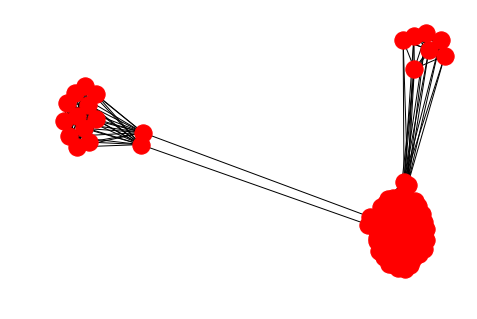

In [51]:
nx.draw(Gt)
plt.draw();

### Connected component subgraph:
A connected subgraph that is not connected to the rest of the graph.

In [0]:
GG =G
G=Gt

In [68]:
len(list(nx.connected_component_subgraphs(G)))

1

In [69]:
# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]
largest_ccs

In [70]:
len(B), len(B.nodes())

(11, 11)

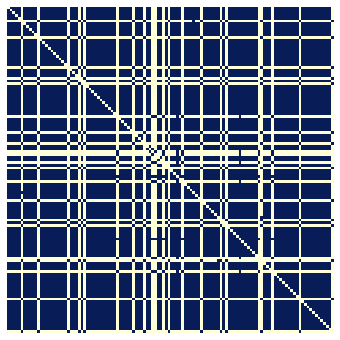

In [71]:
h = nv.MatrixPlot(graph=largest_ccs)
h.draw()
plt.show()

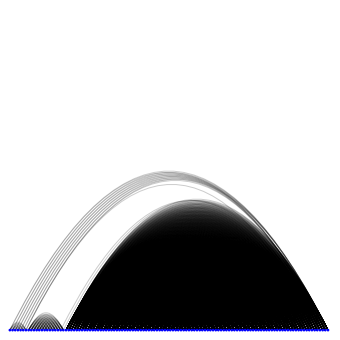

In [72]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the ArcPlot object: a
a = ArcPlot(G,node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

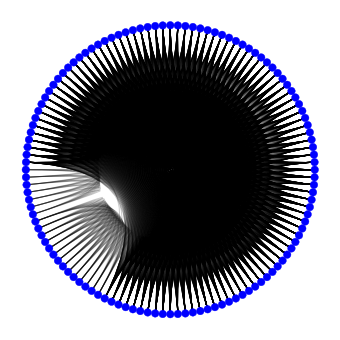

In [67]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the CircosPlot object: c
c = CircosPlot(G,node_order='degree') #node_grouping='grouping',node_color='grouping'

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

You're now going to practice finding cliques in G. Recall that cliques are "groups of nodes that are fully connected to one another", while a maximal clique is a clique that cannot be extended by adding another node in the graph.

In [73]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

6


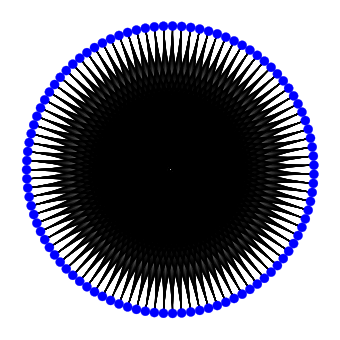

In [74]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

## Finding important collaborators
Almost there! You'll now look at important nodes once more. Here, you'll make use of the degree_centrality() and betweenness_centrality() functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes". In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.

In [75]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

['u3', 'u95']


## Characterizing editing communities
You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

The largest maximal clique in the Github user collaboration network has been assigned to the subgraph G_lmc. Note that for NetworkX version 2.x and later, G.subgraph(nodelist) returns only an immutable view on the original graph. We must explicitly ask for a .copy() of the graph to obtain a mutatable version.

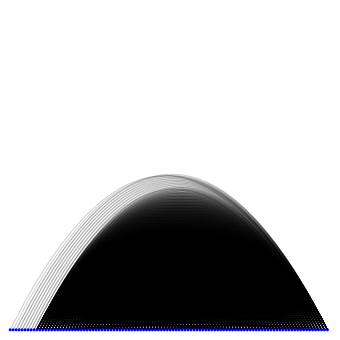

In [76]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))),G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc,node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [78]:
len(G_lmc), len(largest_max_clique)

(108, 99)

### We literally got all the connected people to all the people in the largest clique

## Recommending co-editors who have yet to edit together
Finally, you're going to leverage the concept of open triangles to recommend users on GitHub to collaborate

Compile a list of GitHub users that should be recommended to collaborate with one another. To do this:
In the first for loop, iterate over all the nodes in G, including the metadata (by specifying data=True).
In the second for loop, iterate over all the possible triangle combinations, which can be identified using the combinations() function with a size of 2.
If n1 and n2 do not have an edge between them, a collaboration between these two nodes (users) should be recommended, so increment the (n1), (n2) value of the recommended dictionary in this case. You can check whether or not n1 and n2 have an edge between them using the .has_edge() method.
Using a list comprehension, identify the top 10 pairs of users that should be recommended to collaborate. The iterable should be the key-value pairs of the recommended dictionary (which can be accessed with the .items() method), while the conditional should be satisfied if count is greater than the top 10 in all_counts. Note that all_counts is sorted in ascending order, so you can access the top 10 with all_counts[-10].

In [79]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[]
